# Import and load dataset

In [1]:

from STREAM.data_utils import TMDataset
from STREAM.models import CEDC

dataset = TMDataset()
dataset.fetch_dataset("Spotify_most_popular_new")

c:\Users\anton\anaconda3\envs\ExpandedTM_venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Train the model
If embeddings for the model have been created before, they will not be created again for faster computation

In [2]:
model = CEDC(num_topics=20, embeddings_folder_path="../my_embeddings")  # Create model
model_output = model.train_model(dataset) 

--- preparing the dataset ---
--- loading pre-computed embeddings ---
--- Dimensionality Reduction ---
--- Training the model ---
--- extract topics ---


# Fit Downstream Model

c:\Users\anton\anaconda3\envs\ExpandedTM_venv\lib\site-packages\lightning_fabric\__init__.py:40: Deprecated call to `pkg_resources.declare_namespace('lightning_fabric')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
c:\Users\anton\anaconda3\envs\ExpandedTM_venv\lib\site-packages\pytorch_lightning\__init__.py:37: Deprecated call to `pkg_resources.declare_namespace('pytorch_lightning')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages


c:\Users\anton\Desktop\Projects\ExpandedTM\ExpandedTM\preprocessed_datasets\Spotify_most_popular_new\data.csv


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
c:\Users\anton\anaconda3\envs\ExpandedTM_venv\lib\site-packages\pytorch_lightning\trainer\connectors\logger_connector\logger_connector.py:67: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `pytorch_lightning` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, unless the `tensorboard` or `tensorboardX` packages are found. Please `pip install lightning[extra]` or one of them to enable TensorBoard support by default

  | Name    | Type                | Params
------------------------------------------------
0 | loss_fn | MSELoss             | 0     
1 | model   | NeuralAdditiveModel | 71.7 K
------------------------------------------------
71.7 K    Trainable params
0         Non-trainable params
71.7 K    Total par

Sanity Checking DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]

c:\Users\anton\anaconda3\envs\ExpandedTM_venv\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.


c:\Users\anton\anaconda3\envs\ExpandedTM_venv\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.
c:\Users\anton\anaconda3\envs\ExpandedTM_venv\lib\site-packages\pytorch_lightning\loops\fit_loop.py:293: The number of training batches (8) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Epoch 24: 100%|██████████| 8/8 [00:00<00:00, 13.73it/s, v_num=15, train_loss_step=0.792, val_loss_step=1.150, val_loss_epoch=0.967, train_loss_epoch=0.981]

`Trainer.fit` stopped: `max_epochs=25` reached.


Epoch 24: 100%|██████████| 8/8 [00:00<00:00, 12.88it/s, v_num=15, train_loss_step=0.792, val_loss_step=1.150, val_loss_epoch=0.967, train_loss_epoch=0.981]


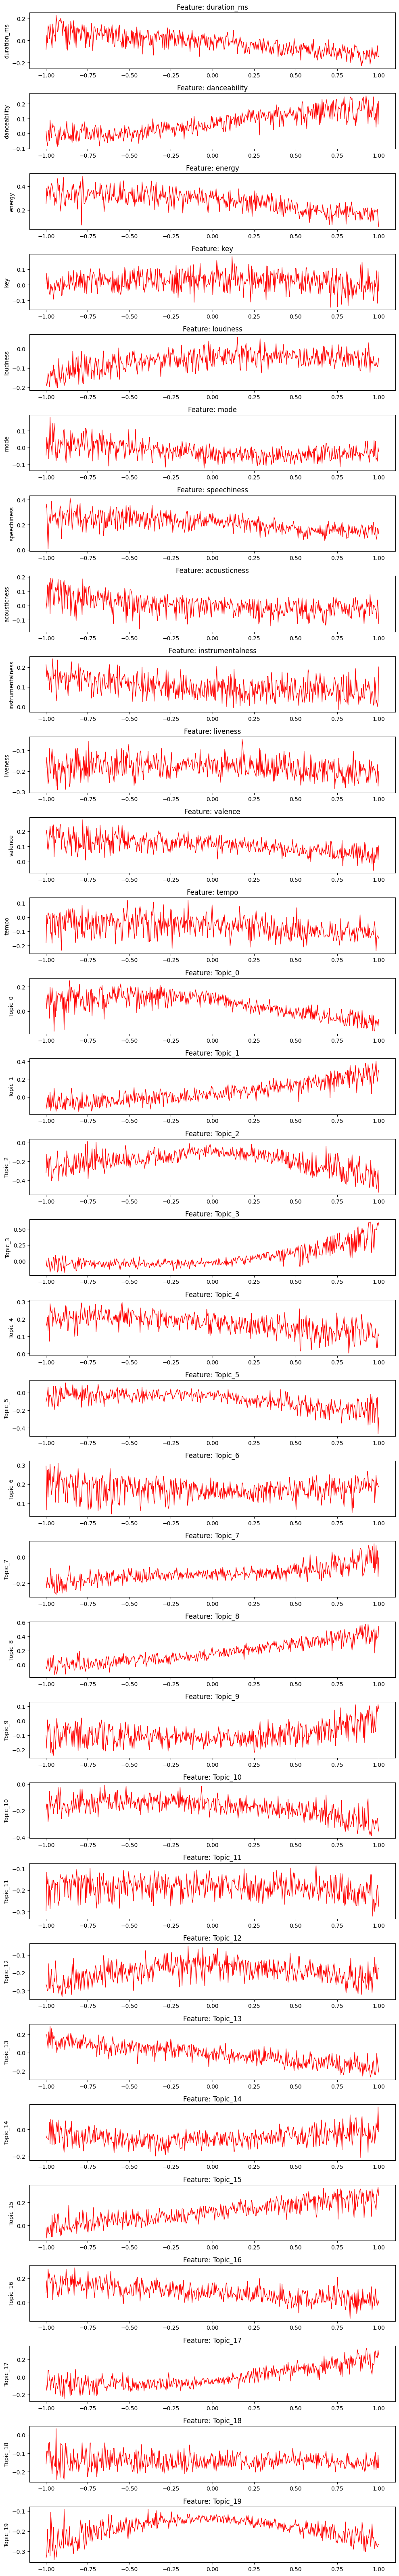

In [3]:
from pytorch_lightning import Trainer
from STREAM.NAM import DownstreamModel

# Instantiate the DownstreamModel
downstream_model = DownstreamModel(
    trained_topic_model=model,
    target_column='popularity',  # Target variable
    task='regression',  # or 'classification'
    dataset=dataset,  
    batch_size=512,
    lr=0.0005
)

# Use PyTorch Lightning's Trainer to train and validate the model
trainer = Trainer(max_epochs=25)
trainer.fit(downstream_model)

# Plotting
downstream_model.plot_feature_nns()

In [4]:
from ExpandedTM.visuals import plot_downstream_model

plot_downstream_model(downstream_model)

ModuleNotFoundError: No module named 'plot_NAM'

In [6]:
downstream_model.combined_data.to_csv("test_data.csv", index=False)

In [6]:
import pandas as pd
data = pd.read_csv("C:/Users/anton/Desktop/Projects/ExpandedTM/ExpandedTM/preprocessed_datasets/Spotify_most_popular_new/data.csv")

data = data.drop("Unnamed: 0", axis="columns")
print(data.head())
data.to_csv("C:/Users/anton/Desktop/Projects/ExpandedTM/ExpandedTM/preprocessed_datasets/Spotify_most_popular_new/data.csv", index=False)

   popularity  duration_ms  danceability  energy  key  loudness  mode  \
0         100       198082         0.677   0.696    0    -6.181     1   
1          98       132780         0.778   0.695    4    -6.865     0   
2          97       215627         0.680   0.826    0    -5.487     1   
3          96       242096         0.586   0.616    5    -7.964     1   
4          96       200040         0.514   0.730    1    -5.934     1   

   speechiness  acousticness  instrumentalness  liveness  valence    tempo  
0       0.1190       0.32100          0.000000    0.4200    0.464   90.030  
1       0.0913       0.17500          0.000000    0.1500    0.472  149.996  
2       0.0309       0.02120          0.000012    0.5430    0.644  118.051  
3       0.0324       0.18200          0.000000    0.0927    0.719  148.088  
4       0.0598       0.00146          0.000095    0.0897    0.334  171.005  


# Evluate your model. 
Use all metrics available either in octis or the ExpandedTM metrics, ISIM, INT, Expressivity, Embedding_Coherence, Embedding_Topic_Diversity and classical NPMI

In [3]:
from ExpandedTM.metrics import Embedding_Coherence
metric = Embedding_Coherence(dataset)
metric.score(model_output)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anton\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anton\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
100%|██████████| 20/20 [00:00<00:00, 260.02it/s]


0.40933349999999996

# Visualize your fit model

In [4]:
from ExpandedTM.visuals import visualize_topic_model, visualize_topics
visualize_topic_model(model)

c:\Users\anton\anaconda3\envs\test_mypackage\lib\site-packages\dash\_jupyter.py:31: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  _dash_comm = Comm(target_name="dash")


In [5]:
visualize_topics(model, port=2)